Sinh viên: Huỳnh Thiện Tùng (19522492)

Bài tập Cài đặt Linear Regression với Tensorflow/Pytorch

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

import numpy as np
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
np.random.seed(1)
tf.set_random_seed(1)

In [3]:
# generate training data
n_sample = 100
x = np.linspace(-20, 20, n_sample)
y = np.linspace(-20, 20, n_sample)

x += np.random.normal(0, 2, n_sample)
y += np.random.normal(0, 2, n_sample)

In [4]:
print(x.shape)
print(y.shape)

(100,)
(100,)


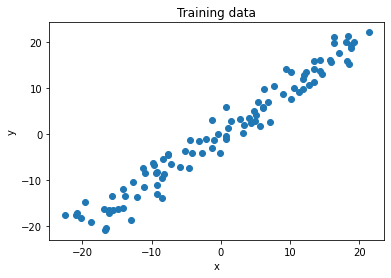

In [5]:
# visualize the data
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Training data')
plt.show()

Now we will start creating our model by defining the placeholders X and Y, so that we can feed our training examples X and Y into the optimizer during the training process.

In [6]:
X = tf.placeholder('float')
Y = tf.placeholder('float')

W = tf.Variable(np.random.randn(), name='W')
b = tf.Variable(np.random.randn(), name='b')

In [7]:
# define hyperparameters
learning_rate = 0.01
training_epochs = 1000

In [8]:
# define hypothesis
y_hat = tf.add(tf.multiply(X, W), b)

# mean square error cost function
cost = tf.reduce_sum(tf.pow(y_hat - Y, 2) / (2 * n_sample))

# optimizer using Gradient Descent and minimize cost function
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Global Variables Initializer
init = tf.global_variables_initializer()

In [9]:
with tf.Session() as sess:
    
    # initializing the global variables
    sess.run(init)
    
    for epoch in range(training_epochs):
        # Feeding each data point into the optimizer using Feed Dictionary
        for (_x, _y) in zip(x, y):
            sess.run(optimizer, feed_dict={X: _x, Y: _y})
        
        # Display after 50-th epoch
        if (epoch + 1) % 50 == 0:
            c = sess.run(cost, feed_dict={X: _x, Y: _y})
            print(f'Epoch {epoch + 1}: cost = {c}, W = {sess.run(W)}; b = {sess.run(b)}')
    
    # Storing necessary values to be used outside the Session
    training_cost = sess.run(cost, feed_dict ={X: x, Y: y})
    weight = sess.run(W)
    bias = sess.run(b)

Epoch 50: cost = 0.0005930516053922474, W = 0.9889995455741882; b = 0.5837875604629517
Epoch 100: cost = 0.0008664641063660383, W = 0.9917439222335815; b = 0.45318174362182617
Epoch 150: cost = 0.0010593824554234743, W = 0.9934242963790894; b = 0.3732125163078308
Epoch 200: cost = 0.0011870689922943711, W = 0.9944533109664917; b = 0.324245810508728
Epoch 250: cost = 0.0012688387650996447, W = 0.9950833320617676; b = 0.2942637801170349
Epoch 300: cost = 0.001320244511589408, W = 0.9954690933227539; b = 0.2759053707122803
Epoch 350: cost = 0.001352230436168611, W = 0.9957053661346436; b = 0.26466354727745056
Epoch 400: cost = 0.0013720113784074783, W = 0.9958499670028687; b = 0.25778070092201233
Epoch 450: cost = 0.0013841978507116437, W = 0.9959383606910706; b = 0.25356611609458923
Epoch 500: cost = 0.0013916845200583339, W = 0.9959926009178162; b = 0.25098541378974915
Epoch 550: cost = 0.0013962768716737628, W = 0.996025800704956; b = 0.24940530955791473
Epoch 600: cost = 0.00139908026

In [10]:
# Calculating the predictions
predictions = weight * x + bias
print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, '\n')

Training cost = 3.001006 Weight = 0.99607766 bias = 0.24693725 



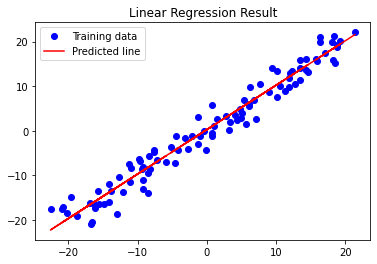

In [13]:
# Plotting the Results
plt.plot(x, y, 'bo', label ='Training data')
plt.plot(x, predictions, 'r', label ='Predicted line')
plt.title('Linear Regression Result')
plt.legend()
plt.show()